In [87]:
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from us import states
from scipy.stats import linregress
import matplotlib.pyplot as plt
from census import Census
from config import api_key,googlekey
from pprint import pprint
c = Census(api_key, year=2018)

## Perform API Calls for each gender's infection count
* Check on each gender's infection number by API call.
* Generate the santa_clara_covin_gender dataframe for display

In [92]:
#the url for infect case by gender in Santa Clara County
url = "https://data.sccgov.org/resource/ibdk-7rf5.json"
response = requests.get(url).json() 
#create gender dataframe
santa_clara_covin_gender = pd.DataFrame(response)
#clear the data for Male and female
santa_clara_covin_gender = santa_clara_covin_gender.loc[
                            (santa_clara_covin_gender.loc[:, "gender"]== "Female")
                            |(santa_clara_covin_gender.loc[:, "gender"]== "Male" )]
#remove two unused colums 
del santa_clara_covin_gender["percent"]
del santa_clara_covin_gender["rates"]
# rename the columns
santa_clara_covin_gender = santa_clara_covin_gender.rename(columns={
                                      "count": "confirm case", #rename column
                                        })

santa_clara_covin_gender.head()

,gender,confirm case
0,Female,4622
1,Male,4563


## Perform API Calls for death count of each gender
* url = "https://data.sccgov.org/resource/v49w-v4a7.json"
* Obtain each gender's death count by API call.
* Obtain gender death count and create the santa_clara_covin_death dataframe
* Meraging two dateframe by Gender column

In [93]:
#the url for death count by gender in Santa Clara County
url = "https://data.sccgov.org/resource/v49w-v4a7.json"
response = requests.get(url).json() 
#create gender dataframe
santa_clara_covin_gender_death = pd.DataFrame(response)
#remove two colums 
del santa_clara_covin_gender_death["percent"]
del santa_clara_covin_gender_death["rates"]

# rename the columns
santa_clara_covin_gender_death = santa_clara_covin_gender_death.rename(columns={
                                      "counts": "death", #rename column
                                        })
# merge two dataframes 
santa_clara_covin_gender = pd.merge(
                                santa_clara_covin_gender, 
                                santa_clara_covin_gender_death, 
                                on = ["gender","gender"])
santa_clara_covin_gender

,gender,confirm case,death
0,Female,4622,82
1,Male,4563,102


## Calls census api for male and female population 
* Perform census API Calls for Male and Female population
* Rename three columns.

In [94]:
# obtain gender population data from census 
census_data = c.acs5.state_county(('NAME',
                                   'B01001_001E', # population 
                                   'B01001_002E', # male population
                                   'B01001_026E' #fenale population
                                  ), states.CA.fips, # california state
                                    county_fips ="085", # Santa Clara county
                                    year=2018 # the data for 2018
                                    )

#create demographic dataframe
santa_clara_census_data = pd.DataFrame(census_data)
santa_clara_census_data = santa_clara_census_data.rename(columns={
                                      "B01001_001E": "population", #rename column
                                      "B01001_002E": "male_pop",#rename column
                                      "B01001_026E": "female_pop" #rename column
                                        })
santa_clara_census_data

,NAME,population,male_pop,female_pop,state,county
0,"Santa Clara County, California",1922200.0,970469.0,951731.0,06,085


## Create population, infect and death rate columns
* Insert popultion, infect rate and death rate column  

In [95]:
# create a new column and insert the female and male population to the column
santa_clara_covin_gender["population"] = \
    santa_clara_census_data.loc[0, ["female_pop", "male_pop"]].to_list()
# create a new coumn for infect rate
santa_clara_covin_gender["infect rate %"] = \
    100 *santa_clara_covin_gender["confirm case"].astype(int)/ santa_clara_covin_gender["population"].astype(int)
# create a new coumn for death rate
santa_clara_covin_gender["death rate %"] = \
    100 *santa_clara_covin_gender["death"].astype(int)/ santa_clara_covin_gender["confirm case"].astype(int)
santa_clara_covin_gender

,gender,confirm case,death,population,infect rate %,death rate %
0,Female,4622,82,951731.0,0.485641,1.774124
1,Male,4563,102,970469.0,0.470185,2.235371


## Infect rate vs. Death rate Plot by Gender 

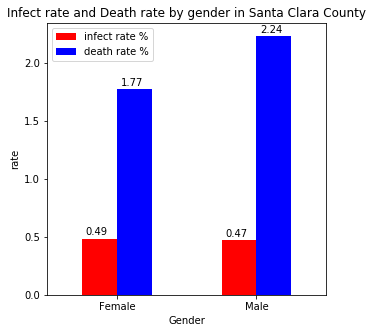

<Figure size 432x288 with 0 Axes>

In [96]:
#Create bar chars for infect rate and death rate 
multi_plot = santa_clara_covin_gender[['infect rate %', 'death rate %']].plot(kind="bar", figsize=(5,5), color=['r','b'])
# X axis from gender column
multi_plot.set_xticklabels(santa_clara_covin_gender["gender"], rotation=0)
# setup title, x axis and y axis 
plt.title("Infect rate and Death rate by gender in Santa Clara County")
plt.xlabel("Gender")
plt.ylabel("rate")
x_offset = -0.1
y_offset = 0.03

for p in multi_plot.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    multi_plot.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()
plt.tight_layout()

## Perform API Calls for each race's death count
* Check on each race's death number by API call.
* Generate the santa_clara_covin_race_death dataframe

In [98]:
#The URL for api call
url = "https://data.sccgov.org/resource/nd69-4zii.json"
# Call API
response = requests.get(url).json() 
#Create dataframe
santa_clara_covin_race_death = pd.DataFrame(response)
#remove the unused api
del santa_clara_covin_race_death["percent"]
del santa_clara_covin_race_death["rates"]
del santa_clara_covin_race_death["percent_pop"]
#rename column
santa_clara_covin_race_death = santa_clara_covin_race_death.rename(columns={
                                      "race_eth": "race", #rename column
                                      "counts": "death count"#rename column
                                        })
santa_clara_covin_race_death.head()

,race,death count
0,African American,8
1,Asian,56
2,Latino,56
3,Native Hawaiian & Other Pacific Islander,0
4,White,53


## Perform API Calls for each race's infection count
* Check on each race's infection count by API call.
* Generate the santa_clara_covin_race dataframe

In [100]:
#api url
url = "https://data.sccgov.org/resource/ccm2-45w3.json"
# Call API
response = requests.get(url).json() 
#create dataframe
santa_clara_covin_race = pd.DataFrame(response)
#remove the unused column
del santa_clara_covin_race["percent_group"]
#rename coulmns
santa_clara_covin_race = santa_clara_covin_race.rename(columns={
                                        "race_eth": "race", #rename column
                                        "percent_pop": "percent_pop%", #rename column
                                        "count": "infect count"#rename column
                                        })
#remove the NaN data
santa_clara_covin_race = santa_clara_covin_race.dropna()
santa_clara_covin_race

,race,infect count,rates,percent_pop%
0,African American,171,360.2,2.36
1,Asian,999,152.5,35.65
2,Latino,4281,782.7,25.78
3,Native Hawaiian & Other Pacific Islander,61,864.1,0.32
4,White,1153,172,32.04


## Perform merging two infection and death dataframes of each race
* Merge two dataframes 
* cut Native Hawaiian value string 
* create three columns, death rate%, percent_pop% and rates

In [102]:
# Merge two dataframes
santa_clara_covin_race_final = pd.merge(santa_clara_covin_race,
                                        santa_clara_covin_race_death, 
                                        on = ["race","race"])
#cut Native Hawaiian value string
row_hawaii = santa_clara_covin_race_final["race"] == "Native Hawaiian & Other Pacific Islander"
santa_clara_covin_race_final.loc[row_hawaii, "race"] = "Native Hawaiian"

#create three columns, death rate%, percent_pop% and rates
santa_clara_covin_race_final["death rate%"] = \
            100 * santa_clara_covin_race_final["death count"].astype(int)/santa_clara_covin_race_final["infect count"].astype(int)
santa_clara_covin_race_final["percent_pop%"] = \
            santa_clara_covin_race_final["percent_pop%"].astype(float)
santa_clara_covin_race_final["rates"] = \
            santa_clara_covin_race_final["rates"].astype(float) /100
santa_clara_covin_race_final

,race,infect count,rates,percent_pop%,death count,death rate%
0,African American,171,3.602,2.36,8,4.678363
1,Asian,999,1.525,35.65,56,5.605606
2,Latino,4281,7.827,25.78,56,1.308106
3,Native Hawaiian,61,8.641,0.32,0,0.000000
4,White,1153,1.720,32.04,53,4.596704


## Infect rate vs. Death rate Plot by race 

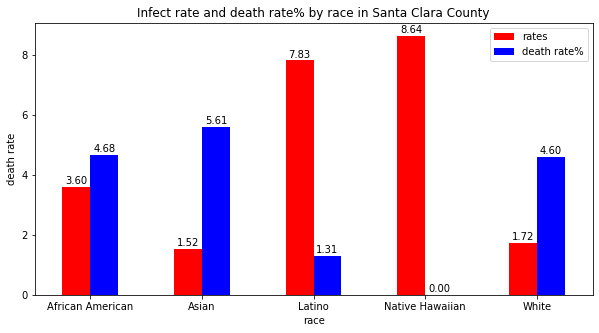

,race,infect count,rates,percent_pop%,death count,death rate%
0,African American,171,3.602,2.36,8,4.678363
1,Asian,999,1.525,35.65,56,5.605606
2,Latino,4281,7.827,25.78,56,1.308106


<Figure size 432x288 with 0 Axes>

In [103]:
multi_plot = santa_clara_covin_race_final[["rates", 'death rate%']].astype(float).plot(kind="bar", figsize=(10,5), color=['r','b'])
multi_plot.set_xticklabels(santa_clara_covin_race_final["race"], rotation=0)
plt.title("Infect rate and death rate% by race in Santa Clara County")
plt.xlabel("race")
plt.ylabel("death rate")
x_offset = -0.1
y_offset = 0.1

for p in multi_plot.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    multi_plot.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()
plt.tight_layout()
santa_clara_covin_race_final.head(3)

## Perform API Calls for covin19 transmission method
* Check on transmission method by API call.
* Generate the santa_clara_method_transmission dataframe

In [104]:
#api url
url = "https://data.sccgov.org/resource/xar3-th86.json"
#api call
response = requests.get(url).json() 
#create dataframe
santa_clara_method_transmission = pd.DataFrame(response)
#convert string to float
santa_clara_method_transmission.loc[:,"percent"] = \
    santa_clara_method_transmission.loc[:,"percent"].astype(float)

## Transmission pie Chart

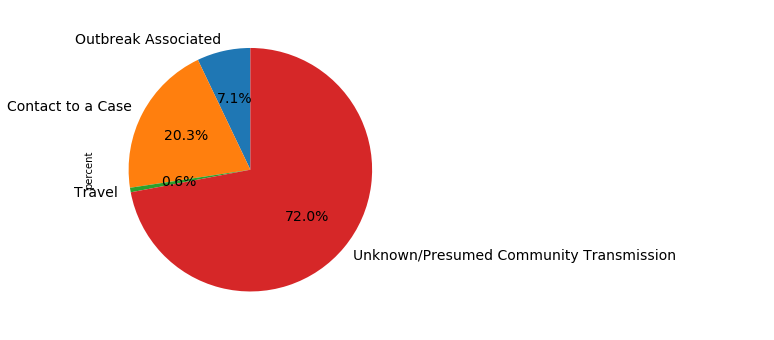

,category,counts,percent
0,Outbreak Associated,464,7.1
1,Contact to a Case,1333,20.3
2,Travel,39,0.6
3,Unknown/Presumed Community Transmission,4739,72.1


In [105]:
plt.figure(figsize=(12,6))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
santa_clara_method_transmission.plot(kind='pie', y = 'percent', ax=ax1, autopct='%1.1f%%', 
         startangle=90, shadow=False, labels=santa_clara_method_transmission['category'], legend = False, fontsize=14)
# plot table
ax2 = plt.subplot(122)
plt.axis('off')
plt.show()
santa_clara_method_transmission

## Perform API Calls infection count by age range
* Check on infection count by API call.
* Generate the santa_clara_covin_age dataframe

In [107]:
#API url
url = "https://data.sccgov.org/resource/ige8-ixqu.json"
#API call 
response = requests.get(url).json() 
#create dataframe 
santa_clara_covin_age = pd.DataFrame(response)
santa_clara_covin_age = santa_clara_covin_age.rename(columns={
                                        "age_group": "age", #rename column
                                        "count": "infect count", #rename column
                                        "rates": "infect_rates"#rename column
                                        })
#drop all NaN data
santa_clara_covin_age=santa_clara_covin_age.dropna()
santa_clara_covin_age

,age,infect count,percent,infect_rates
0,19 or under,1265,13.7,257.9
1,20-29,1786,19.4,722.6
2,30-39,1710,18.6,626.9
3,40-49,1574,17.1,551.4
4,50-59,1238,13.4,456.6
5,60-69,789,8.6,365.7
6,70-79,425,4.6,318.1
7,80-89,264,2.9,414.4
8,90+,154,1.7,938.1


## Perform API Calls death count by age range
* Check on death count by API call.
* Generate the santa_clara_covin_age_death dataframe

In [111]:
#url
url = "https://data.sccgov.org/resource/pg8z-gbgv.json"
#call api
response = requests.get(url).json() 
#create dataframe
santa_clara_covin_age_death = pd.DataFrame(response)
#rename columns
santa_clara_covin_age_death = santa_clara_covin_age_death.rename(columns={
                                        "age_group": "age", #rename column
                                        "count": "death count"#rename column
                                        })
#drop all NaN data
santa_clara_covin_age_death=santa_clara_covin_age_death.dropna()
#clean unknown rows 
santa_clara_covin_age_death = santa_clara_covin_age_death.loc[santa_clara_covin_age_death.loc[:,"age"] != "Unknown"]
santa_clara_covin_age_death

,age,death count,percent,rates
0,19 or under,0,0,0
1,20-29,0,0,0
2,30-39,4,2.2,1.5
3,40-49,6,3.3,2.1
4,50-59,19,10.3,7
5,60-69,30,16.3,13.9
6,70-79,42,22.8,31.4
7,80-89,43,23.4,67.5
8,90+,40,21.7,243.7


## Merage two infection and death count dataframes 

In [112]:
#merage two dataframes
santa_clara_covin_age_death = pd.merge(santa_clara_covin_age, santa_clara_covin_age_death, on = ["age","age"])
#creat a new column
santa_clara_covin_age_death["death rate"] = \
    100 * santa_clara_covin_age_death["death count"].astype(int)/santa_clara_covin_age_death["infect count"].astype(int)
santa_clara_covin_age_death

,age,infect count,percent_x,infect_rates,death count,percent_y,rates,death rate
0,19 or under,1265,13.7,257.9,0,0,0,0.000000
1,20-29,1786,19.4,722.6,0,0,0,0.000000
2,30-39,1710,18.6,626.9,4,2.2,1.5,0.233918
3,40-49,1574,17.1,551.4,6,3.3,2.1,0.381194
4,50-59,1238,13.4,456.6,19,10.3,7,1.534733
5,60-69,789,8.6,365.7,30,16.3,13.9,3.802281
6,70-79,425,4.6,318.1,42,22.8,31.4,9.882353
7,80-89,264,2.9,414.4,43,23.4,67.5,16.287879
8,90+,154,1.7,938.1,40,21.7,243.7,25.974026


## Age range vs. Death rate Plot 

The r-squared is: 0.8690012175894569
The regression displays a positive correlation.


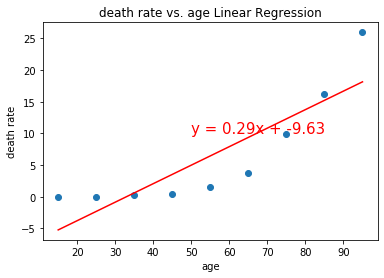

,age,infect count,percent_x,infect_rates,death count,percent_y,rates,death rate,age_x
0,19 or under,1265,13.7,257.9,0,0,0,0.000000,15
1,20-29,1786,19.4,722.6,0,0,0,0.000000,25
2,30-39,1710,18.6,626.9,4,2.2,1.5,0.233918,35
3,40-49,1574,17.1,551.4,6,3.3,2.1,0.381194,45
4,50-59,1238,13.4,456.6,19,10.3,7,1.534733,55


In [113]:
#create x axis for display
santa_clara_covin_age_death["age_x"] = np.arange(15, 105, 10)
x_values = santa_clara_covin_age_death["age_x"].astype(int)
y_values = santa_clara_covin_age_death["death rate"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('age')
plt.ylabel('death rate')
plt.title(f"death rate vs. age Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()
santa_clara_covin_age_death.head()

## Age range vs. Infect count Plot 

The r-squared is: -0.8883960983303485
The regression displays a negative correlation.


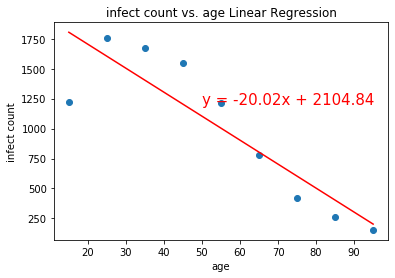

In [178]:
x_values = santa_clara_covin_age_death["age_x"].astype(int)
y_values = santa_clara_covin_age_death["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,1200),fontsize=15,color="red")
plt.xlabel('age')
plt.ylabel('infect count')
plt.title(f"infect count vs. age Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

## Perform API Calls infection count by city
* Check on infection count by API call.
* Generate the santa_clara_covin_city dataframe
* Insert population density column to dataframe

In [119]:
#url
url = "https://data.sccgov.org/resource/59wk-iusg.json"
#api call
response = requests.get(url).json() 
santa_clara_covin_city = pd.DataFrame(response)
#clean data
santa_clara_covin_city = santa_clara_covin_city.dropna()
# rename 
santa_clara_covin_city = santa_clara_covin_city.rename(columns={
                                        "cases": "infect count" #rename column
                                        })
# insert populcation density 
santa_clara_covin_city["population density"] \
    = santa_clara_covin_city["population"].astype(int)/ 1922200
#remove unused columns 
del santa_clara_covin_city["population"]
del santa_clara_covin_city["rate"]
santa_clara_covin_city.head()

,geo_id,city,infect count,population density
0,610345,Campbell,183,0.022094
1,617610,Cupertino,69,0.031534
2,629504,Gilroy,494,0.028886
3,643280,Los Altos,67,0.015913
4,643294,Los Altos Hills,17,0.004431


### Call google api and get lat and lng 
* Use the Lat and Lng as locations 

In [120]:
#creat 2 empty columns for lat and lng
Lat = []
Lng = []
name = []
#inital google api key
params = {
    "key": googlekey
}
#google url lat and lng
target_url = 'https://maps.googleapis.com/maps/api/geocode/json?'

#loop and find lat and lng
for index, row in santa_clara_covin_city.iterrows():
    params["address"] = row["city"] + ",ca"
    response = requests.get(target_url, params=params)
    places_data = response.json()
    Lat.append(places_data['results'][0]['geometry']["location"]["lat"])
    Lng.append(places_data['results'][0]['geometry']["location"]["lng"])

#insert two columns to city dataframe
santa_clara_covin_city["Lat"]=Lat
santa_clara_covin_city["Lng"]=Lng
santa_clara_covin_city.head()

,geo_id,city,infect count,population density,Lat,Lng
0,610345,Campbell,183,0.022094,37.287165,-121.949957
1,617610,Cupertino,69,0.031534,37.322998,-122.032182
2,629504,Gilroy,494,0.028886,37.002983,-121.556637
3,643280,Los Altos,67,0.015913,37.385218,-122.114130
4,643294,Los Altos Hills,17,0.004431,37.379663,-122.137464


### City pointer about covin 19
* Configure gmaps.
* Use the Lat and Lng as locations and count.

In [121]:
info_box_template = """
<dl>
<dt>City </dt><dd>{city}</dd>
<dt>Confirm case</dt><dd>{infect count}</dd>
</dl>
"""
census_info = [info_box_template.format(**row) for index, row in santa_clara_covin_city.iterrows()]
locations = santa_clara_covin_city[['Lat', 'Lng']].astype(float)
gmaps.configure(api_key=googlekey)
fig = gmaps.figure()
marker_layer = gmaps.marker_layer( locations,info_box_content = census_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

## population density vs. infect count Plot by city

The r-squared is: 0.9949366956194844
The regression displays a positive correlation.


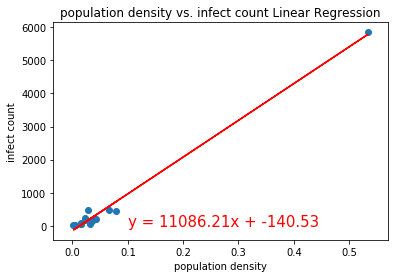

In [191]:
x_values = santa_clara_covin_city["population density"].astype(float)
y_values = santa_clara_covin_city["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.1,0.1),fontsize=15,color="red")
plt.xlabel('population density')
plt.ylabel('infect count')
plt.title(f"population density vs. infect count Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()

## Search the infect count outlier in city list

lower quartile of infect count is: 68.0
upper quartile of infect count is: 336.5
interquartile range of infect count is: 268.5
the median of infect count is: 183.0 
There is one outlier greater than upper bound at 5970.0.
-------------------------------------------------------------------


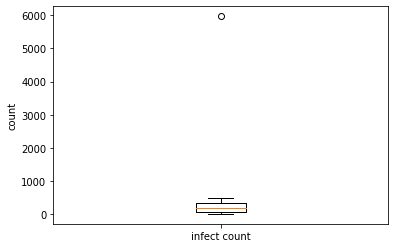

In [122]:
display_list = ["infect count"]
display_vol_list = []
for display in display_list:
    display_vol_list.append(santa_clara_covin_city[display].astype(float))
    
quartiles = santa_clara_covin_city[display].astype(float).quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
print(f"lower quartile of infect count is: {round(lowerq,2)}")
print(f"upper quartile of infect count is: {round(upperq,2)}")
print(f"interquartile range of infect count is: {round(iqr,2)}")
print(f"the median of infect count is: {round(quartiles[0.5],2)} ")
    
if (lower_bound > santa_clara_covin_city[display].astype(float).min()):
    print(f"There is at least 1 outlier lower than lower bound at {santa_clara_covin_city[display].astype(float).min()}.")   
elif (upper_bound < santa_clara_covin_city[display].astype(float).max()):
    print(f"There is one outlier greater than upper bound at {santa_clara_covin_city[display].astype(float).max()}.")

print("-------------------------------------------------------------------")
   
fig1, ax1 = plt.subplots()
ax1.set_ylabel('count')
ax1.boxplot(display_vol_list)
ax1.set_xticklabels(display_list)
plt.show()

## Population density vs. infect count Plot by city after removing outlier

The r-squared is: 0.7819330707587443
The regression displays a positive correlation. after remove outlier


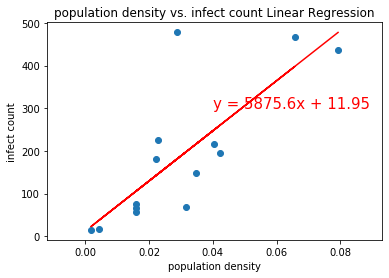

In [193]:
x_values = santa_clara_covin_city[santa_clara_covin_city["city"] \
                                  != "San Jose"]["population density"].astype(float)
y_values = santa_clara_covin_city[santa_clara_covin_city["city"] \
                                  != "San Jose"]["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.04,300),fontsize=15,color="red")
plt.xlabel('population density')
plt.ylabel('infect count')
plt.title(f"population density vs. infect count Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation. after remove outlier")
plt.show()


## Perform API Calls infection count by zipcode
* Check on infection count by API call.
* Generate the santa_clara_covin_zipcode dataframe
* Insert infect count and infect rate columns to dataframe

In [123]:
#call url 
url = "https://data.sccgov.org/resource/j2gj-bg6c.json"
response = requests.get(url).json() 
#create dataframe 
santa_clara_covin_zipcode = pd.DataFrame(response)

#rename columns
santa_clara_covin_zipcode = santa_clara_covin_zipcode.rename(\
                    columns={"cases": "infect count" #rename column
                            })
#Insert infect count and infect rate columns 
santa_clara_covin_zipcode['infect count'] = \
    santa_clara_covin_zipcode['infect count'].fillna(0)
santa_clara_covin_zipcode['rate'] = \
    santa_clara_covin_zipcode['rate'].fillna(0)
santa_clara_covin_zipcode["infect rate"] =\
    100 * santa_clara_covin_zipcode["infect count"].astype(int)/santa_clara_covin_zipcode["population"].astype(int)
santa_clara_covin_zipcode.head()

,zipcode,infect count,population,rate,infect rate
0,94022,43,19378,222,0.221901
1,94024,41,23961,171,0.171111
2,94040,74,35845,206,0.206444
3,94041,49,14394,340,0.340420
4,94043,68,31488,216,0.215955


### Call google api and get lat and lng by zipcode
* Use the Lat and Lng as locations 

In [124]:
Lat = []
Lng = []
name = []
params = {
    "key": googlekey
}
target_url = 'https://maps.googleapis.com/maps/api/geocode/json?'

for index, row in santa_clara_covin_zipcode.iterrows():
    params["address"] = row["zipcode"]
    response = requests.get(target_url, params=params)
    places_data = response.json()
    name.append(places_data['results'][0]['formatted_address'].split(',')[0])
    Lat.append(places_data['results'][0]['geometry']["location"]["lat"])
    Lng.append(places_data['results'][0]['geometry']["location"]["lng"])

santa_clara_covin_zipcode["Lat"]=Lat
santa_clara_covin_zipcode["Lng"]=Lng
santa_clara_covin_zipcode.head()

,zipcode,infect count,population,rate,infect rate,Lat,Lng
0,94022,43,19378,222,0.221901,37.369401,-122.140541
1,94024,41,23961,171,0.171111,37.347826,-122.100787
2,94040,74,35845,206,0.206444,37.378535,-122.086585
3,94041,49,14394,340,0.340420,37.386812,-122.075155
4,94043,68,31488,216,0.215955,37.406224,-122.078166


### Infect count Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and infect count as the weight.
* Add Heatmap layer to map.

In [125]:
gmaps.configure(api_key=googlekey)
fig = gmaps.figure()
# get lat and Lng from zipcode dataframe
locations = santa_clara_covin_zipcode[['Lat', 'Lng']].astype(float)
# infect count as the weight.
confirm = santa_clara_covin_zipcode["infect count"].astype(int)

fig = gmaps.figure(center=(37.331583,-121.770834), zoom_level=9)

gmap_layer = gmaps.heatmap_layer(
                                locations, 
                                weights = confirm,
                                dissipating=False,
                                max_intensity=620,
                                point_radius = 0.05)
fig.add_layer(gmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

### Insert population density by zip code 

In [126]:
santa_clara_covin_zipcode["population density"] = santa_clara_covin_zipcode["population"].astype(int)/ 1922200
santa_clara_covin_zipcode.head()

,zipcode,infect count,population,rate,infect rate,Lat,Lng,population density
0,94022,43,19378,222,0.221901,37.369401,-122.140541,0.010081
1,94024,41,23961,171,0.171111,37.347826,-122.100787,0.012465
2,94040,74,35845,206,0.206444,37.378535,-122.086585,0.018648
3,94041,49,14394,340,0.340420,37.386812,-122.075155,0.007488
4,94043,68,31488,216,0.215955,37.406224,-122.078166,0.016381


## Population density vs. infect count Plot by zipcode

The r-squared is: 0.7250551588389511
The regression displays a positive correlation.


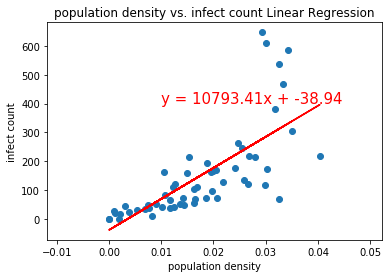

In [12]:
x_values = santa_clara_covin_zipcode["population density"].astype(float)
y_values = santa_clara_covin_zipcode["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.01,400),fontsize=15,color="red")
plt.xlabel('population density')
plt.ylabel('infect count')
plt.title(f"population density vs. infect count Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()

## Population density vs. infect rate Plot by zipcode

The r-squared is: 0.1776012521947716
The regression displays a positive correlation.


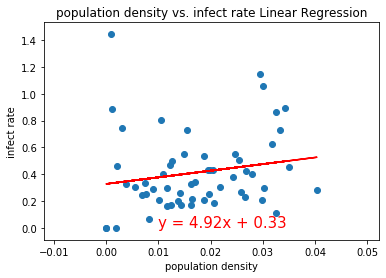

In [13]:
x_values = santa_clara_covin_zipcode["population density"].astype(float)
y_values = santa_clara_covin_zipcode["infect rate"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.01,0.01),fontsize=15,color="red")
plt.xlabel('population density')
plt.ylabel('infect rate')
plt.title(f"population density vs. infect rate Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()

## Calls census api for zipcode 
* Perform census API Calls for population, Median Age, Household Income, Per Capita Income and Poverty Count
* Rename columns.

In [127]:
#call census api by zipcode 
santa_clara_census_zip = c.acs5.get(("B19013_001E", 
                                     "B01003_001E", 
                                     "B01002_001E",
                                     "B19301_001E",
                                     "B17001_002E",
                                     "B23025_004E",
                                     "B23025_002E",
                                     "B23025_005E"),
                                    {'for': 'zip code tabulation area:*'})
#create dataframe 
santa_clara_census_zip = pd.DataFrame(santa_clara_census_zip)
#rename 
santa_clara_census_zip = santa_clara_census_zip.rename(columns={
                                      "B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_004E": "employment_employed",
                                      "B23025_002E": "Labor_force",
                                      "B23025_005E": "employment_unemployed",
                                    "zip code tabulation area": "zipcode"})

## Merge census dataframe and  zipcode dataframe
* Perform census API Calls for population, Median Age, Household Income, Per Capita Income and Poverty Count
* Rename columns.

In [128]:
santa_clara_covin_zipcode_final = \
    pd.merge(santa_clara_covin_zipcode, santa_clara_census_zip, 
             how="left", 
             on = ["zipcode","zipcode"])
santa_clara_covin_zipcode_final.head()

,zipcode,infect count,population,rate,infect rate,Lat,Lng,population density,Household Income,Population,Median Age,Per Capita Income,Poverty Count,employment_employed,Labor_force,employment_unemployed
0,94022,43,19378,222,0.221901,37.369401,-122.140541,0.010081,216042.0,19378.0,48.1,122105.0,833.0,8111.0,8370.0,259.0
1,94024,41,23961,171,0.171111,37.347826,-122.100787,0.012465,237454.0,23961.0,46.2,106527.0,679.0,10643.0,11085.0,425.0
2,94040,74,35845,206,0.206444,37.378535,-122.086585,0.018648,129188.0,35845.0,35.1,73521.0,2681.0,19591.0,20335.0,744.0
3,94041,49,14394,340,0.340420,37.386812,-122.075155,0.007488,129444.0,14394.0,34.3,75692.0,946.0,9033.0,9410.0,377.0
4,94043,68,31488,216,0.215955,37.406224,-122.078166,0.016381,125916.0,31488.0,34.7,71492.0,2046.0,18620.0,19404.0,623.0


## Create Poverty Rate, Employment Rate and Unemployment Rate

In [129]:
santa_clara_covin_zipcode_final["Poverty Rate"] = 100 * \
    santa_clara_covin_zipcode_final["Poverty Count"].astype(
        int) / santa_clara_covin_zipcode_final["Population"].astype(int)

# Add in Poverty Rate (Poverty Count / Population)
santa_clara_covin_zipcode_final["Employment Rate"] = 100 * \
    santa_clara_covin_zipcode_final["employment_employed"].astype(
        int) / santa_clara_covin_zipcode_final["Labor_force"].astype(int)
    
# Add in Poverty Rate (Poverty Count / Population)
santa_clara_covin_zipcode_final["Unemployment Rate"] = 100 * \
    santa_clara_covin_zipcode_final["employment_unemployed"].astype(
        int) / santa_clara_covin_zipcode_final["Labor_force"].astype(int)
santa_clara_covin_zipcode_final.head()

,zipcode,infect count,population,rate,infect rate,Lat,Lng,population density,Household Income,Population,Median Age,Per Capita Income,Poverty Count,employment_employed,Labor_force,employment_unemployed,Poverty Rate,Employment Rate,Unemployment Rate
0,94022,43,19378,222,0.221901,37.369401,-122.140541,0.010081,216042.0,19378.0,48.1,122105.0,833.0,8111.0,8370.0,259.0,4.298689,96.905615,3.094385
1,94024,41,23961,171,0.171111,37.347826,-122.100787,0.012465,237454.0,23961.0,46.2,106527.0,679.0,10643.0,11085.0,425.0,2.833772,96.012630,3.834010
2,94040,74,35845,206,0.206444,37.378535,-122.086585,0.018648,129188.0,35845.0,35.1,73521.0,2681.0,19591.0,20335.0,744.0,7.479425,96.341284,3.658716
3,94041,49,14394,340,0.340420,37.386812,-122.075155,0.007488,129444.0,14394.0,34.3,75692.0,946.0,9033.0,9410.0,377.0,6.572183,95.993624,4.006376
4,94043,68,31488,216,0.215955,37.406224,-122.078166,0.016381,125916.0,31488.0,34.7,71492.0,2046.0,18620.0,19404.0,623.0,6.497713,95.959596,3.210678


## Per Capita Income vs. infect count Plot by zipcode

The r-squared is: -0.48687672277244826
The regression displays a negative correlation.


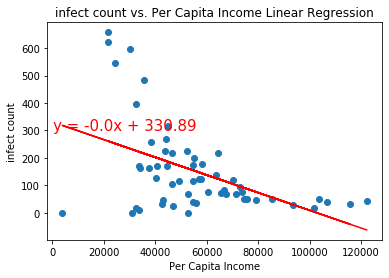

In [130]:
x_values = santa_clara_covin_zipcode_final["Per Capita Income"].astype(float)
y_values = santa_clara_covin_zipcode_final["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,300),fontsize=15,color="red")
plt.xlabel('Per Capita Income')
plt.ylabel('infect count')
plt.title(f"infect count vs. Per Capita Income Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

## Median Age vs. infect count Plot by zipcode

The r-squared is: -0.2620454553919513
The regression displays a negative correlation.


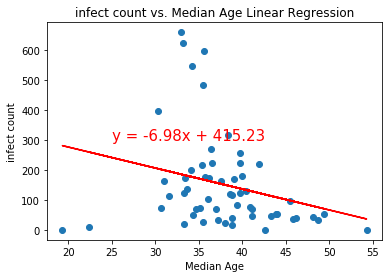

In [131]:
x_values = santa_clara_covin_zipcode_final["Median Age"].astype(float)
y_values = santa_clara_covin_zipcode_final["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,300),fontsize=15,color="red")
plt.xlabel('Median Age')
plt.ylabel('infect count')
plt.title(f"infect count vs. Median Age Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

## Poverty Rate vs. infect count Plot by zipcode

The r-squared is: 0.49997866540383545
The regression displays a positive correlation.


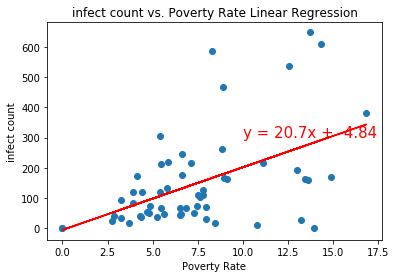

In [33]:
x_values = santa_clara_covin_zipcode_final["Poverty Rate"].astype(float)
y_values = santa_clara_covin_zipcode_final["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,300),fontsize=15,color="red")
plt.xlabel('Poverty Rate')
plt.ylabel('infect count')
plt.title(f"infect count vs. Poverty Rate Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()

## Employment Rate vs. infect count Plot by zipcode

The r-squared is: -0.22710517006415
The regression displays a negative correlation.


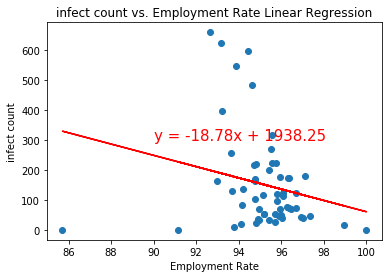

In [132]:
x_values = santa_clara_covin_zipcode_final["Employment Rate"].astype(float)
y_values = santa_clara_covin_zipcode_final["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(90,300),fontsize=15,color="red")
plt.xlabel('Employment Rate')
plt.ylabel('infect count')
plt.title(f"infect count vs. Employment Rate Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()

## Unemployment Rate vs. infect count Plot by zipcode

The r-squared is: 0.22914120272144817
The regression displays a negative correlation.


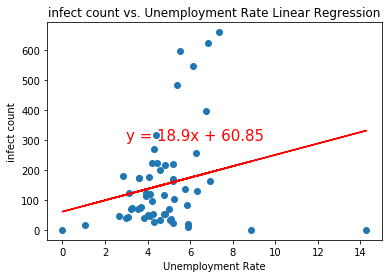

In [133]:
x_values = santa_clara_covin_zipcode_final["Unemployment Rate"].astype(float)
y_values = santa_clara_covin_zipcode_final["infect count"].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,300),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('infect count')
plt.title(f"infect count vs. Unemployment Rate Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.show()


## Perform API Calls for new case by date and Plot
* Obtain new case by date by API call.

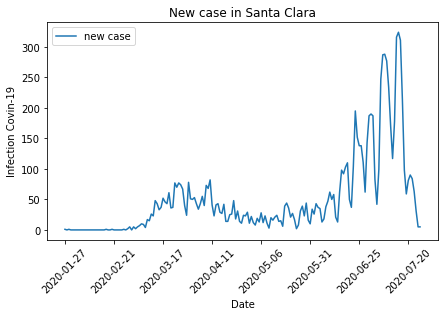

,date,total case,new case,time
0,2020-01-27,1.0,1.0,00:00:00.000
1,2020-01-28,1.0,0.0,00:00:00.000
2,2020-01-29,2.0,1.0,00:00:00.000


<Figure size 432x288 with 0 Axes>

In [134]:
#call api
url = "https://data.sccgov.org/resource/6cnm-gchg.json"
response = requests.get(url).json() 
#create dataframe 
santa_clara_covin_date = pd.DataFrame(response)
#clean the data 
santa_clara_covin_date = santa_clara_covin_date.dropna()
#rename 
santa_clara_covin_date = santa_clara_covin_date.rename(\
                        columns={"new_cases": "new case", #rename column
                                 "total_cases": "total case"
                                })
#get date from date column
santa_clara_covin_date[['date','time']] \
    = santa_clara_covin_date["date"].str.split("T",expand=True)
santa_clara_covin_date[["new case","total case"]] = \
    santa_clara_covin_date[["new case","total case"]].astype(float)
santa_clara_covin_date_chart=santa_clara_covin_date.loc[:,["date","new case"]]
multi_plot = santa_clara_covin_date_chart.plot.line(x="date", title="New case in Santa Clara", figsize=(7,4));
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Infection Covin-19")
plt.show()
plt.tight_layout()
santa_clara_covin_date.head(3)

## Perform API Calls for death case by date and Plot
* Obtain death case by date by API call.

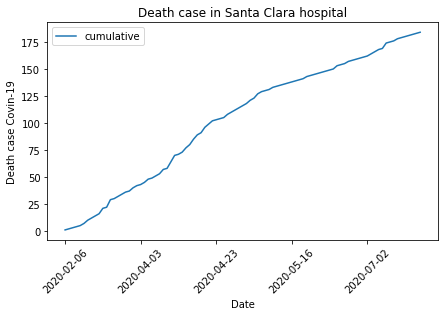

,date,ltcf,non_ltcf,total,cumulative,time
0,2020-02-06,0.0,1.0,1,1.0,00:00:00.000
1,2020-02-17,0.0,1.0,1,2.0,00:00:00.000
2,2020-03-06,0.0,1.0,1,3.0,00:00:00.000


<Figure size 432x288 with 0 Axes>

In [136]:
#call api
url = "https://data.sccgov.org/resource/tg4j-23y2.json"
response = requests.get(url).json() 
#create dataframe 
santa_clara_covin_death_date = pd.DataFrame(response)
santa_clara_covin_death_date = santa_clara_covin_death_date.dropna()
santa_clara_covin_death_date[['date','time']] \
    = santa_clara_covin_death_date["date"].str.split("T",expand=True)


santa_clara_covin_death_date[["non_ltcf","ltcf","cumulative"]] = \
    santa_clara_covin_death_date[["non_ltcf","ltcf", "cumulative"]].astype(float)
santa_clara_covin_death_date_chart=\
    santa_clara_covin_death_date.loc[:,["date","cumulative"]]
multi_plot = santa_clara_covin_death_date_chart.plot.line(x="date", title="Death case in Santa Clara hospital", figsize=(7,4));
plt.xticks(rotation=45 )
plt.xlabel("Date")
plt.ylabel("Death case Covin-19")
plt.show()
plt.tight_layout()
santa_clara_covin_death_date.head(3)

## Perform API Calls for the positive case by date and Plot
* Obtain the positive case by date by API call.

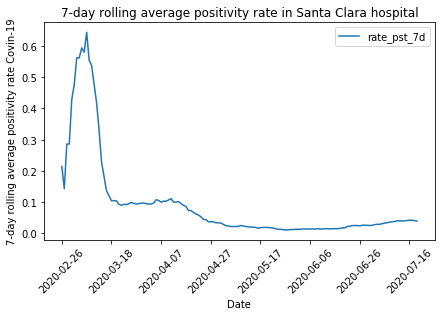

,collection_date,post_rslt,neg_rslt,total,rate_pst_7d,test_rate_7d,date,time
6,2020-02-26T00:00:00.000,1.0,1.0,2,0.214,0.058,2020-02-26,00:00:00.000
7,2020-02-28T00:00:00.000,1.0,1.0,2,0.143,0.065,2020-02-28,00:00:00.000
8,2020-02-29T00:00:00.000,3.0,0.0,3,0.286,0.080,2020-02-29,00:00:00.000


<Figure size 432x288 with 0 Axes>

In [137]:
#call api
url = "https://data.sccgov.org/resource/dvgc-tzgq.json"
response = requests.get(url).json() 
santa_clara_covin_test_date = pd.DataFrame(response)
#create dataframe 
santa_clara_covin_test_date = santa_clara_covin_test_date.dropna()
santa_clara_covin_test_date[['date','time']] \
    = santa_clara_covin_test_date["collection_date"].str.split("T",expand=True)
santa_clara_covin_test_date[["neg_rslt","post_rslt", "rate_pst_7d", "test_rate_7d"]] = \
    santa_clara_covin_test_date[["neg_rslt","post_rslt", "rate_pst_7d", "test_rate_7d"]].astype(float)
santa_clara_covin_test_date_chart=\
    santa_clara_covin_test_date.loc[:,["date","rate_pst_7d"]]
multi_plot = santa_clara_covin_test_date_chart.plot.line(x="date", title="7-day rolling average positivity rate in Santa Clara hospital", figsize=(7,4));
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("7-day rolling average positivity rate Covin-19")
plt.show()
plt.tight_layout()
santa_clara_covin_test_date.head(3)

## Perform API Calls for ICU beds available by date and Plot
* Obtain the ICU beds available by date by API call.

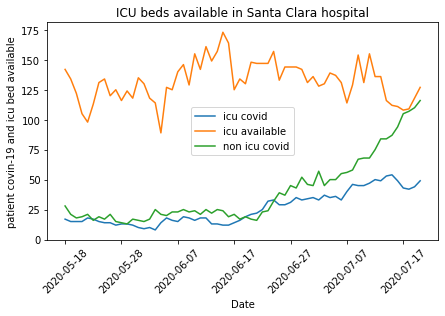

,date,icu covid,icu_pui,icu available,non icu covid,non_icu_pui,non icu available,vents_pts,covid_total,pui_total,...,icu_covid_pui_pct_7davg,non_icu_covid_pct_7davg,non_icu_covid_pui_pct_7davg,icu_other,non_icu_other,ped_covid_pui,covid_new,ped_icu_beds,vents_available,time
52,2020-05-18,17.0,2,142.0,28.0,26,784.0,157,45,28,...,0.068,0.014,0.024,162,1103,1,3,36,412,00:00:00.000
53,2020-05-19,15.0,1,134.0,21.0,25,818.0,153,36,26,...,0.066,0.013,0.024,184,1052,1,5,32,442,00:00:00.000
54,2020-05-20,15.0,0,122.0,18.0,19,801.0,153,33,19,...,0.062,0.012,0.023,197,1079,1,2,32,455,00:00:00.000


<Figure size 432x288 with 0 Axes>

In [138]:
# call api
url = "https://data.sccgov.org/resource/5xkz-6esm.json"
response = requests.get(url).json()  
#create api
santa_clara_covin_hospital_date = pd.DataFrame(response)
santa_clara_covin_hospital_date = santa_clara_covin_hospital_date.dropna()
santa_clara_covin_hospital_date[['date','time']] \
    = santa_clara_covin_hospital_date["date"].str.split("T",expand=True)

santa_clara_covin_hospital_date = santa_clara_covin_hospital_date.rename(\
                        columns={"icu_covid": "icu covid", #rename column
                                 "icu_available": "icu available",
                                 "non_icu_covid": "non icu covid",
                                 "non_icu_available": "non icu available",
                                })
santa_clara_covin_hospital_date[["icu covid", "icu available", "non icu covid", "non icu available"]] = \
    santa_clara_covin_hospital_date[["icu covid", "icu available", "non icu covid", "non icu available"]].astype(float)
santa_clara_covin_hospital_date_chart=\
    santa_clara_covin_hospital_date.loc[:,["date","icu covid", "icu available", "non icu covid"]]
multi_plot = santa_clara_covin_hospital_date_chart.plot.line(x="date", title="ICU beds available in Santa Clara hospital", figsize=(7,4));
plt.xticks(rotation=45 ) 
plt.xlabel("Date")
plt.ylabel("patient covin-19 and icu bed available")
plt.show()
plt.tight_layout()
santa_clara_covin_hospital_date.head(3)